# Exercise 8: Bootstrap

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import uniform

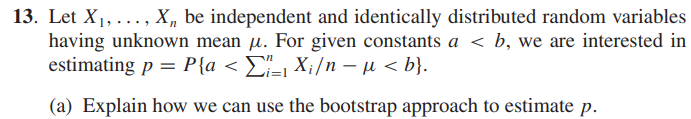

Since $\mu$ is unknown, we must also estimate it from the bootstrap samples. We do this by taking the mean of the mean of all bootstrap samples.

Then, for each bootstrap sample we compute the difference between the sample mean and $\mu$.

The probability $p$ can then be estimated as the proportion of these differences that fall outside the interval $(a, b)$.

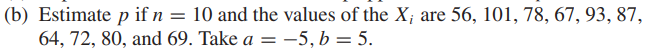

In [29]:
xi = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
n = 10
a = -5
b = 5

n_bootstrap = 10_000

bootstrap_samples = np.random.choice(xi, size=(n_bootstrap, 10))

mu = np.mean(bootstrap_samples)

bootstrap = np.sum(bootstrap_samples / n, axis=1) - mu
p = np.mean(np.abs(bootstrap) < 5)
print(f"{p = :.2f}")

p = 0.77


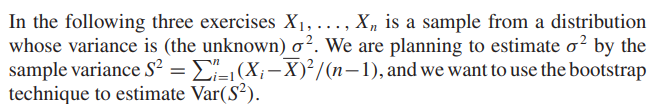

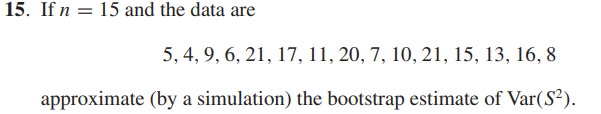

In [25]:
data = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])

n = data.shape[0]
n_bootstrap = 10_000

bootstrap_samples = np.random.choice(data, size=(n_bootstrap, n))

x_bar = np.mean(bootstrap_samples, axis=1).reshape(-1, 1)

S2 = np.sum((bootstrap_samples - x_bar)**2 / (n - 1), axis=1)

var_S2 = np.var(S2)

print(f"Var(S^2) = {var_S2:.2f}")

Var(S^2) = 57.56


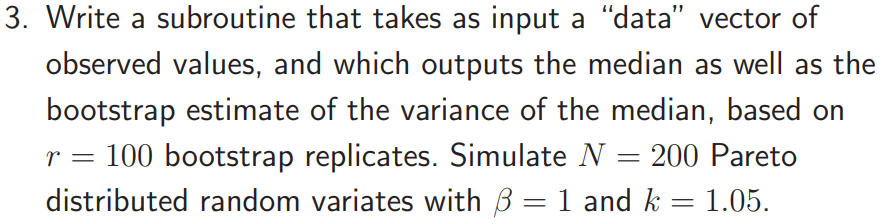

In [31]:
def sample_pareto(n, k, beta):
    us = uniform.rvs(size=n)
    return beta * us ** (-1/k)

n = 200

sample = sample_pareto(n, k=1.05, beta=1)

bootstrap_samples = np.random.choice(sample, size=(100, n))

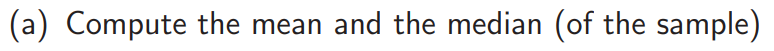

In [32]:
sample_mean = np.mean(sample)
sample_median = np.median(sample)

print(f"Sample mean   = {sample_mean:.2f}")
print(f"Sample median = {sample_median:.2f}")

Sample mean   = 5.46
Sample median = 1.90


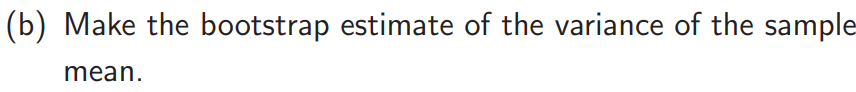

In [35]:
bs_var_of_sample_mean = np.var(np.mean(bootstrap_samples, axis=1))

print(f"Variance of sample mean (bootsrap estimate): {bs_var_of_sample_mean:.4f}")

Variance of sample mean (bootsrap estimate): 0.8488


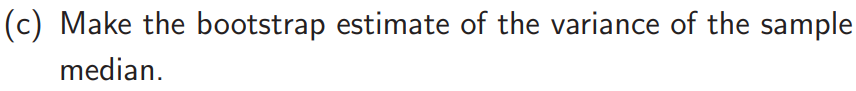

In [36]:
bs_var_of_sample_median = np.var(np.median(bootstrap_samples, axis=1))

print(f"Variance of sample median (bootsrap estimate): {bs_var_of_sample_median:.4f}")

Variance of sample median (bootsrap estimate): 0.0124


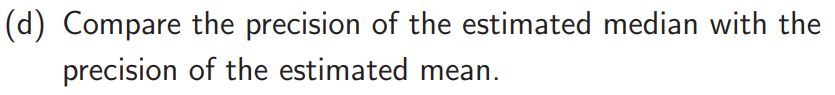

In [42]:
std_mean = np.sqrt(bs_var_of_sample_mean)
std_median = np.sqrt(bs_var_of_sample_median)
diff_of_stds = std_mean - std_median

print(f"Difference of std(sample mean) and std(sample median): {diff_of_stds:.4f}")

Difference of std(sample mean) and std(sample median): 0.8100


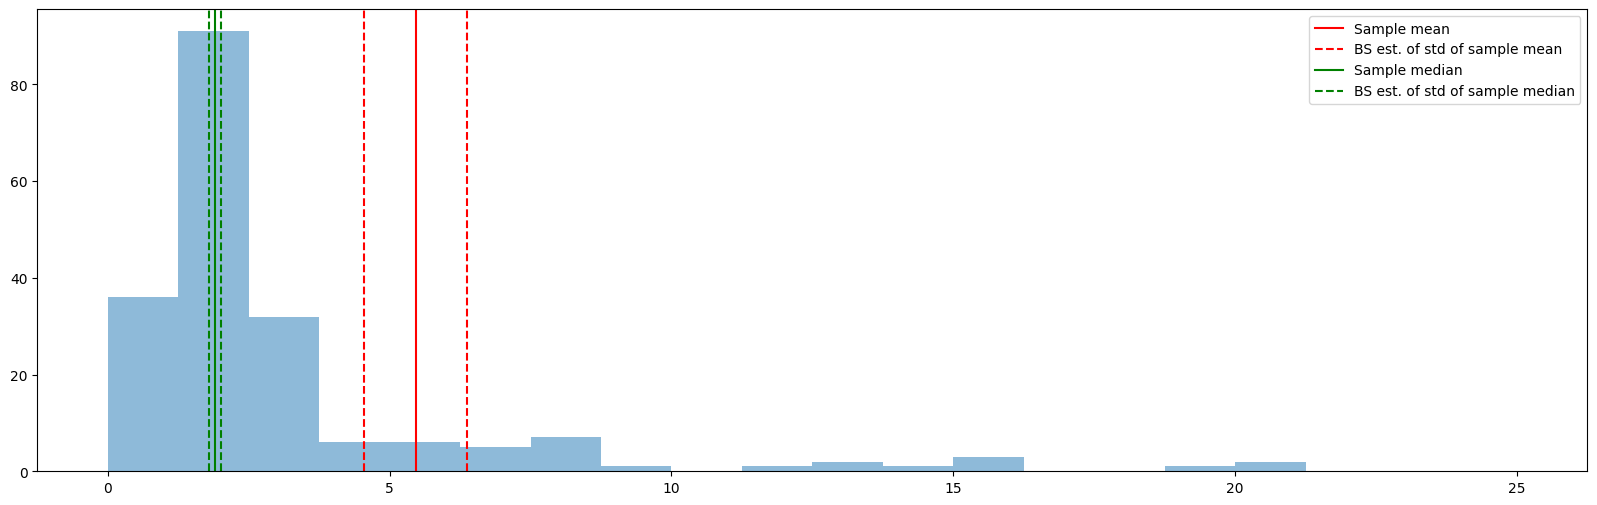

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax.hist(sample, range=(0, 25), bins=20, alpha=0.5)
ax.axvline(sample_mean, color="r", label="Sample mean")
ax.axvline(sample_mean + std_mean, color="r", linestyle="--", label="BS est. of std of sample mean")
ax.axvline(sample_mean - std_mean, color="r", linestyle="--")

ax.axvline(sample_median, color="g", label="Sample median")
ax.axvline(sample_median + std_median, color="g", linestyle="--", label="BS est. of std of sample median")
ax.axvline(sample_median - std_median, color="g", linestyle="--")

ax.legend()

plt.show()